In [1]:

import pandas as pd
import numpy as np
import openpyxl


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro



# Carga de datos

In [2]:
questions_df = pd.read_excel("/Users/joshua/Documents/Proyectos/alien_case/alien_case___space_case.xlsx", sheet_name="Question")
cohort_data_df = pd.read_excel("/Users/joshua/Documents/Proyectos/alien_case/alien_case___space_case.xlsx", sheet_name="Cohort Data")
high_level_data_df = pd.read_excel("/Users/joshua/Documents/Proyectos/alien_case/alien_case___space_case.xlsx", sheet_name="High Level Data")

# Muestra de una vista previa de cada hoja para entender su contenido
questions_df.head(), cohort_data_df.head(), high_level_data_df.head()


(   Unnamed: 0                                         Unnamed: 1
 0         NaN                                                NaN
 1         NaN                                                NaN
 2         NaN                                                NaN
 3         NaN                                                NaN
 4         NaN  Context:  Imagine a world where we have discov...,
   Unnamed: 0 Summarized dataset         Unnamed: 2  \
 0        NaN                NaN                NaN   
 1        NaN                NaN                NaN   
 2        NaN             Cohort  SHIP_SAFETY_SCORE   
 3    2116-11             211611         (650, 675]   
 4    2116-11             211611         (650, 675]   
 
                        Unnamed: 3   Unnamed: 4     Unnamed: 5  Unnamed: 6  \
 0                             NaN          NaN            NaN         NaN   
 1                             NaN          NaN            NaN         NaN   
 2  Months Since Arriving on Earth  A

# Estructura de Datos

In [3]:
questions_df.drop(columns=["Unnamed: 0"], inplace=True)

## Preguntas

In [4]:
questions_df = questions_df[5:]

In [5]:
print(questions_df.iloc[0].values)
print(questions_df.iloc[1].values)
print(questions_df.iloc[2].values)
print(questions_df.iloc[3].values)

['Your job:  You have been hired as an analyst (or "alienyst") to ensure the model and policies on allowing aliens to enter Earth is working as intended.  If the model or policies are not working as intended, it is your job to fix it!']
['Issue:  On the tab "high level data", you can see that the percentage of alien ships breaking down on Earth has been rising.  Someone in the media got ahold of this chart.  Now, humans and aliens are concerned about aliens visiting!']
['Ask: Create a short presentation (~4 to 6 slides) to explain if we should be concerned about what is hapening and how we should react.  You may use the data from "Cohort Data" and "High Level Data" tabs.  Consider overall impacts, policy changes, future analysis/next steps, data issues, etc.  Given the case is ficticous, please do not consider political fallout, moral implicatioins, etc.']
['Caveat: The numbers in this case are purely ficticious. There is no connection to reality. This case has simply been designed for

In [6]:
"""Context:  Imagine a world where we have discovered alien life!  Aliens are friendly and are allowed to visit our world!  
Unfortunately, alien ships are not built for Earth's atmosphere.  Most of the time, nothing happens.  
But occassionally, the ships break-down while on Earth and cause very expensive repairs for the alien AND cost humans very rare resources to fix the ships.   
(1) Aliens and humans want as many aliens as possible to visit Earth!  
(2) Aliens want to avoid expensive repairs.  
(3) Earth cannot be sustained if too many ships need to be repaired! 

So a team of super-""star"" data scientists built a model (SHIP_SAFETY_SCORE) that predicts if an alien ship will survive in Earth's atmosphere.


Your job:  You have been hired as an analyst (or "alienyst") to ensure the model and policies on allowing aliens to enter Earth is working as intended.  
If the model or policies are not working as intended, it is your job to fix it!

Issue:  On the tab "high level data", you can see that the percentage of alien ships breaking down on Earth has been rising.  
Someone in the media got ahold of this chart.  Now, humans and aliens are concerned about aliens visiting!

Ask: Create a short presentation (~4 to 6 slides) to explain if we should be concerned about what is hapening and how we should react.  
You may use the data from "Cohort Data" and "High Level Data" tabs.  Consider overall impacts, policy changes, future analysis/next steps, data issues, etc.  
Given the case is ficticous, please do not consider political fallout, moral implicatioins, etc.

Caveat: The numbers in this case are purely ficticious. There is no connection to reality. This case has simply been designed for applying basic analytical skills.
"Assumptions:  
1/ Every alien visits Earth for exactly 15 months.  The ships may break down at any point in their 15 month stay on Earth.
2/ Aliens want to avoid expensive repairs!  Earth cannot be sustained if too many ships need to be repaired.  
3/ To help out Earth, each alien ship that comes to Earth drops off a very small amount of resources. These resources can be used to repair alien ships and make Earth better.  
    The amount of resources that alien's brings to Earth cannot be changed.
4/ In the past, the organization allowed alien ships to travel to Earth with a SHIP_SAFETY_SCORE > 650 to travel to Earth.  The organization was comfortable with this policy.
5/ Additional data is available iin the ""Cohort Data"" tab.  ""Cohort"" refers to a single month where aliens traveled to Earth
6/ No outside research or additional data is required to complete this case.
"""

'Context:  Imagine a world where we have discovered alien life!  Aliens are friendly and are allowed to visit our world!  \nUnfortunately, alien ships are not built for Earth\'s atmosphere.  Most of the time, nothing happens.  \nBut occassionally, the ships break-down while on Earth and cause very expensive repairs for the alien AND cost humans very rare resources to fix the ships.   \n(1) Aliens and humans want as many aliens as possible to visit Earth!  \n(2) Aliens want to avoid expensive repairs.  \n(3) Earth cannot be sustained if too many ships need to be repaired! \n\nSo a team of super-""star"" data scientists built a model (SHIP_SAFETY_SCORE) that predicts if an alien ship will survive in Earth\'s atmosphere.\n\n\nYour job:  You have been hired as an analyst (or "alienyst") to ensure the model and policies on allowing aliens to enter Earth is working as intended.  \nIf the model or policies are not working as intended, it is your job to fix it!\n\nIssue:  On the tab "high leve

## Cohort Data

In [7]:
cohort_data_df.columns = cohort_data_df.iloc[2]
ch_df = cohort_data_df.iloc[3:].reset_index(drop=True)
ch_df = ch_df[['Cohort', 'SHIP_SAFETY_SCORE', 'Months Since Arriving on Earth', 'Alien Ships', 'Ships Damaged']]
ch_df.columns = ['cohort', 'score', 'months', 'ships', 'damaged']


In [9]:
ch_df['months'] =  pd.to_numeric(ch_df['months'], errors='coerce')
ch_df['ships'] =  pd.to_numeric(ch_df['ships'], errors='coerce')
ch_df['damaged'] =  pd.to_numeric(ch_df['damaged'], errors='coerce')

In [10]:
ch_df.head()

,cohort,score,months,ships,damaged
0,211611,"(650, 675]",0,1324,0
1,211611,"(650, 675]",1,1324,0
2,211611,"(650, 675]",2,1324,13
3,211611,"(650, 675]",3,1324,29
4,211611,"(650, 675]",4,1324,40


## High Level Data

In [11]:
high_level_data_df.columns = ['del','month', 'req_repair_perc']
hl_df = high_level_data_df.loc[1:,['month', 'req_repair_perc']].reset_index(drop=True)

In [12]:
hl_df.head()

,month,req_repair_perc
0,2114-09-01 00:00:00,0.003797
1,2114-10-01 00:00:00,0.000883
2,2114-11-01 00:00:00,0.001799
3,2114-12-01 00:00:00,0.00159
4,2115-01-01 00:00:00,0.001492


In [13]:
# Damos formato a las variables high_level_data
hl_df['month'] =  pd.to_datetime(hl_df['month'], errors='coerce')
hl_df['req_repair_perc'] =  pd.to_numeric(hl_df['req_repair_perc'], errors='coerce')

In [14]:
#Después de revisar high level data encontré la relación de esos datos con el dataframe de cohort data
#Por lo que decidí unirlos en un solo dataframe
ch_df['cohort'] = ch_df['cohort'].astype(str)


In [15]:
ch_df['mes_llegada'] = ch_df['cohort'].apply(lambda x: x[:4] + '-' + x[4:]) #Agrego un guión para separar el año de la cohorte
ch_df['mes_llegada'] =  pd.to_datetime(ch_df['mes_llegada'], errors='coerce')

In [16]:
#Sumo los meses de llegada con los meses en la tierra
ch_df['mes_desp'] = ch_df.apply(lambda x: x['mes_llegada'] + relativedelta(months=x['months']), axis=1) 

# Analisis Exploratorio de Datos

In [17]:
ch_df.head(16)

,cohort,score,months,ships,damaged,mes_llegada,mes_desp
0,211611,"(650, 675]",0,1324,0,2116-11-01,2116-11-01
1,211611,"(650, 675]",1,1324,0,2116-11-01,2116-12-01
2,211611,"(650, 675]",2,1324,13,2116-11-01,2117-01-01
3,211611,"(650, 675]",3,1324,29,2116-11-01,2117-02-01
4,211611,"(650, 675]",4,1324,40,2116-11-01,2117-03-01
5,211611,"(650, 675]",5,1324,48,2116-11-01,2117-04-01
6,211611,"(650, 675]",6,1324,58,2116-11-01,2117-05-01
7,211611,"(650, 675]",7,1324,59,2116-11-01,2117-06-01
8,211611,"(650, 675]",8,1324,60,2116-11-01,2117-07-01
9,211611,"(650, 675]",9,1324,63,2116-11-01,2117-08-01


In [18]:
# Genero una variable de porcentaje de daño, para tener una variable normalizada y comparable
ch_df['damaged_perc'] = ch_df["damaged"] / ch_df['ships']

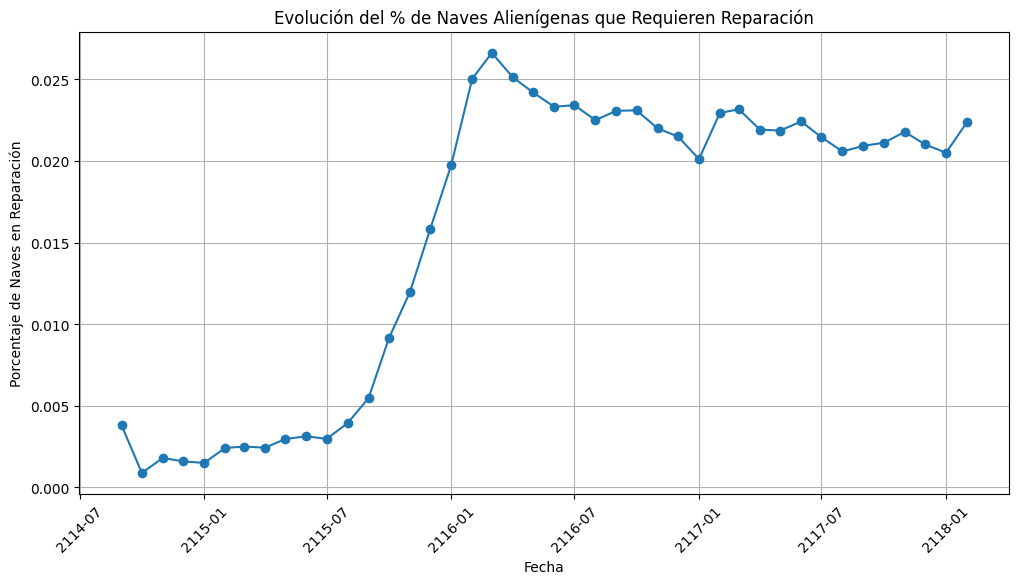

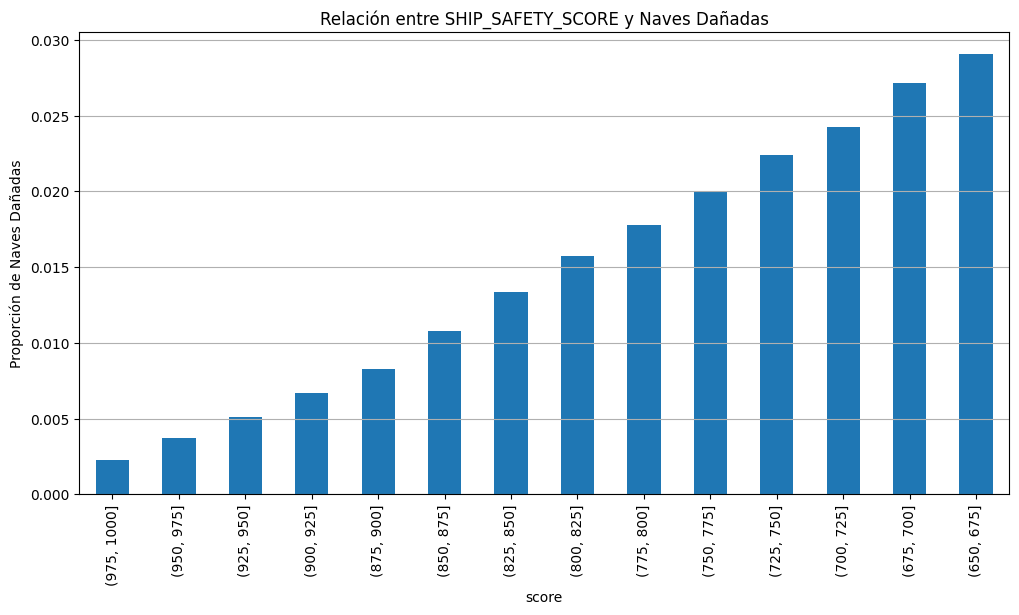

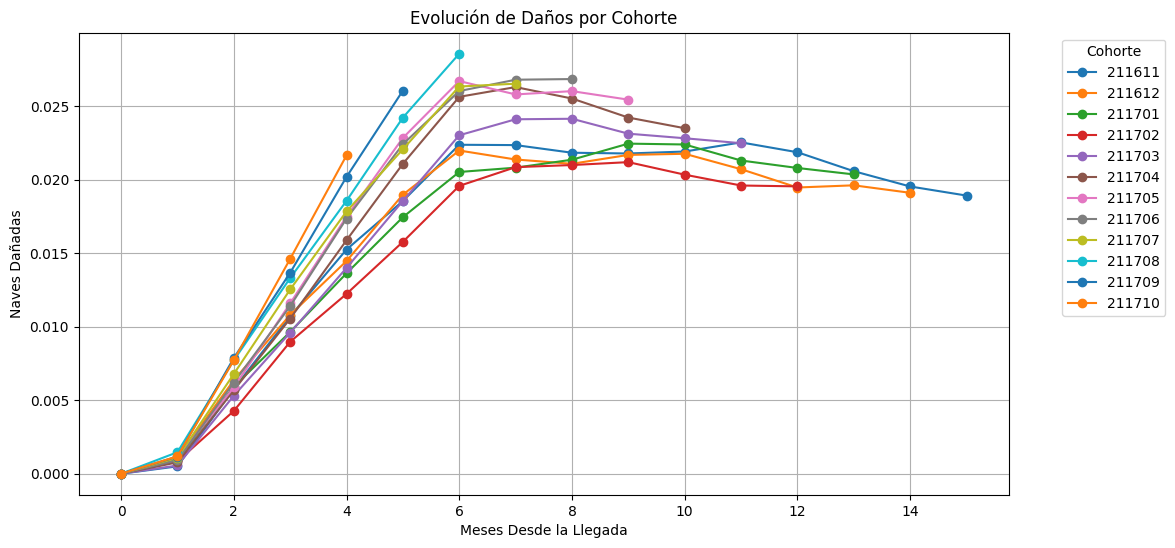

In [ ]:


# 1. Distribución de daños en las naves a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(hl_df["month"], hl_df["req_repair_perc"], marker='o', linestyle='-')
plt.xlabel("Fecha")
plt.ylabel("Porcentaje de Naves en Reparación")
plt.title("Evolución del % de Naves Alienígenas que Requieren Reparación")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2. Distribución de SHIP_SAFETY_SCORE y probabilidad de daño
safety_damage_df = ch_df.groupby("score")["damaged"].sum() / ch_df.groupby("score")["ships"].sum()

plt.figure(figsize=(12, 6))
safety_damage_df.sort_values().plot(kind="bar")
plt.xlabel("score")
plt.ylabel("Proporción de Naves Dañadas")
plt.title("Relación entre SHIP_SAFETY_SCORE y Naves Dañadas")
plt.grid(axis="y")
plt.show()

# 3. Evolución del daño en cohortes
cohort_damage_trend = ch_df.groupby(["cohort", "months"])["damaged_perc"].mean().unstack()

plt.figure(figsize=(12, 6))
for cohort in cohort_damage_trend.index:  
    plt.plot(cohort_damage_trend.columns, cohort_damage_trend.loc[cohort], marker='o', linestyle='-', label=cohort)

plt.xlabel("Meses Desde la Llegada")
plt.ylabel("Naves Dañadas")
plt.title("Evolución de Daños por Cohorte")
plt.legend(title="Cohorte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


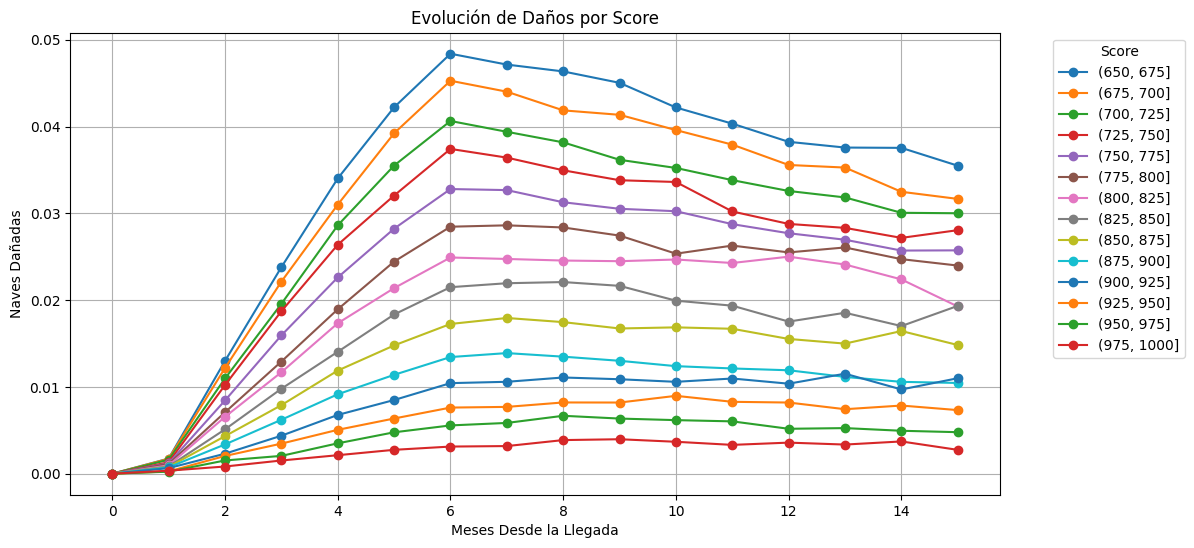

In [21]:
# 3. Evolución del daño en Score
cohort_damage_trend = ch_df.groupby(["score", "months"])["damaged_perc"].mean().unstack()

plt.figure(figsize=(12, 6))
for cohort in cohort_damage_trend.index: 
    plt.plot(cohort_damage_trend.columns, cohort_damage_trend.loc[cohort], marker='o', linestyle='-', label=cohort)

plt.xlabel("Meses Desde la Llegada")
plt.ylabel("Naves Dañadas")
plt.title("Evolución de Daños por Score")
plt.legend(title="Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


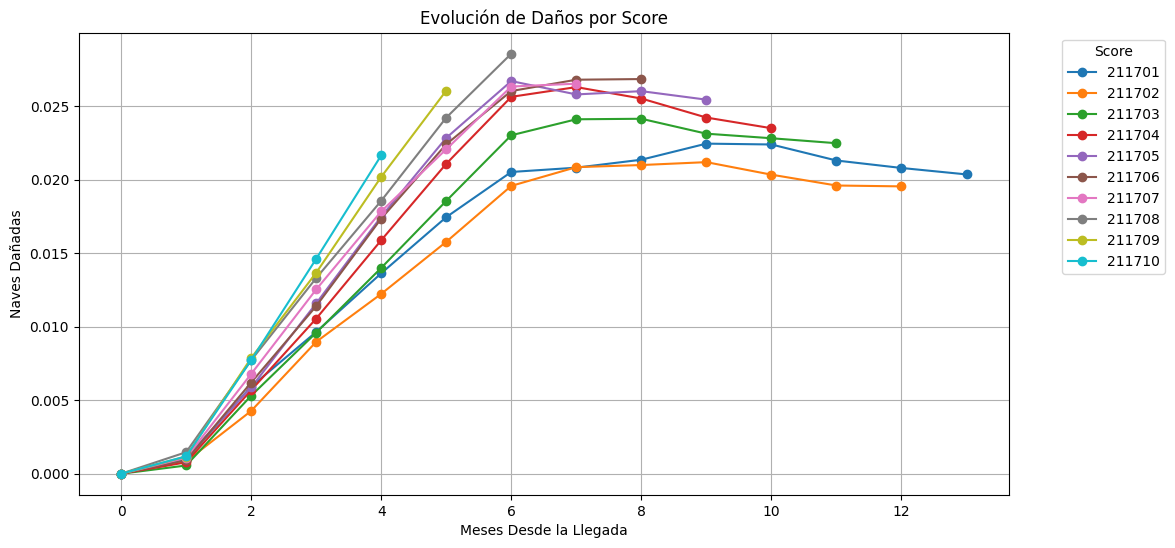

In [22]:
# 3. Evolución del daño en cohortes
cohort_damage_trend = ch_df[ch_df['mes_llegada'] >= '2117-01-01'].groupby(['cohort', "months"])["damaged_perc"].mean().unstack()

plt.figure(figsize=(12, 6))
for cohort in cohort_damage_trend.index:  
    plt.plot(cohort_damage_trend.columns, cohort_damage_trend.loc[cohort], marker='o', linestyle='-', label=cohort)

plt.xlabel("Meses Desde la Llegada")
plt.ylabel("Naves Dañadas")
plt.title("Evolución de Daños por Score")
plt.legend(title="Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

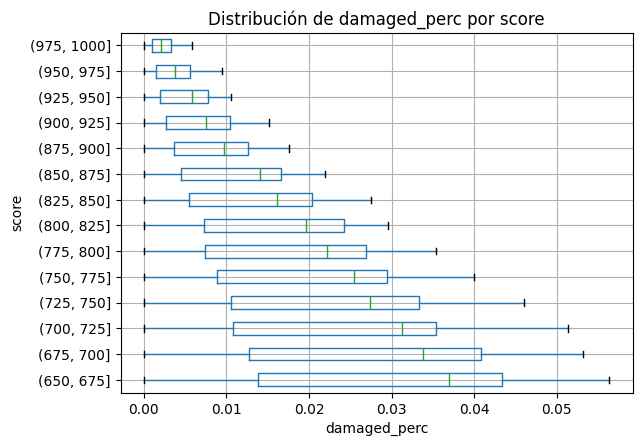

In [23]:
plt.figure(figsize=(10, 6))
ch_df.boxplot(column='damaged_perc', by='score', vert=False)
plt.title('Distribución de damaged_perc por score')
plt.suptitle('')
plt.xlabel('damaged_perc')
plt.ylabel('score')
plt.show()

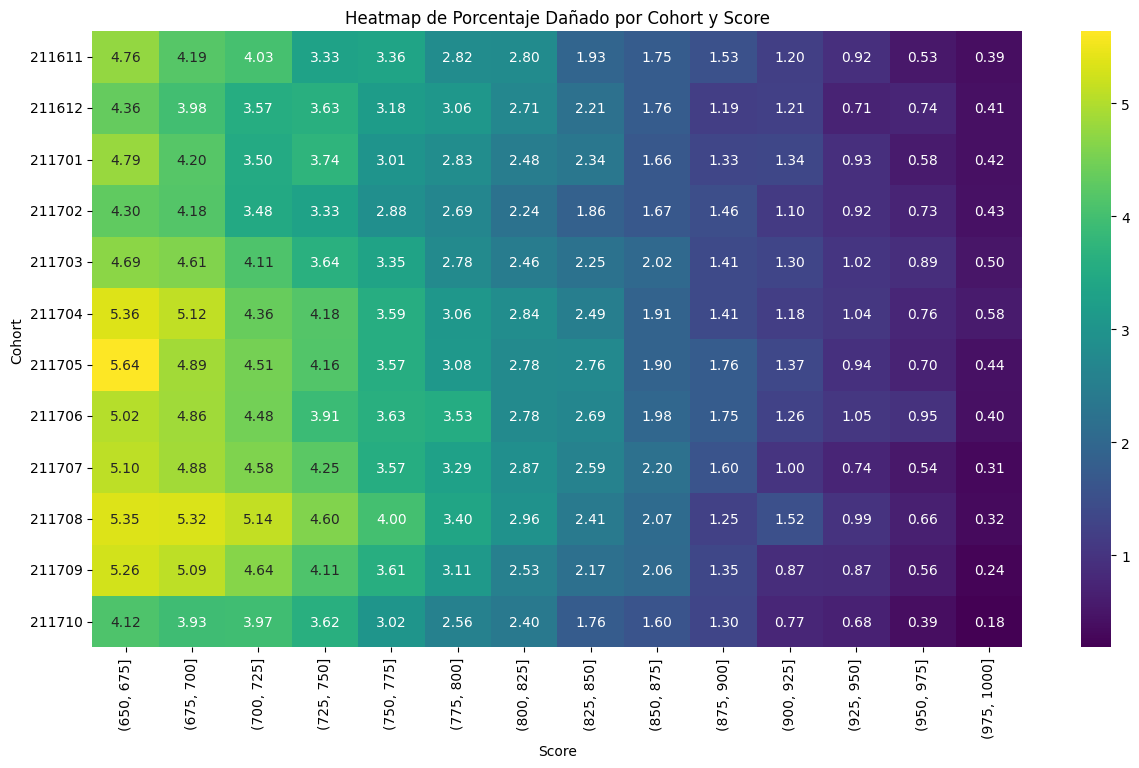

In [24]:

pivot_table = ch_df.groupby(['cohort', 'score'])['damaged_perc'].max().unstack()
pivot_table = pivot_table.astype(float) 
pivot_table = pivot_table*100


plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap de Porcentaje Dañado por Cohort y Score")
plt.xlabel("Score")
plt.ylabel("Cohort")
plt.show()


In [25]:
#Analizando el comportamiento del modelo de score predefinido, se nota que empieza a perder potencia 
#conforme van avanzando las cohortes, por lo que se recomienda ajustarlo para mejorar su precisión

# ANALISIS DEL MODELO - NUEVO MODELO

In [26]:
# Se encuenrtra una relacion estrecha entre el SHIP_SAFETY_SCORE y el porcentaje máximo de daño en las naves

In [27]:
metric = (1000 - ch_df.groupby(['cohort', 'score'])['damaged_perc'].max()*10000).reset_index()

In [28]:
metric

,cohort,score,damaged_perc
0,211611,"(650, 675]",524.169184
1,211611,"(675, 700]",580.810433
2,211611,"(700, 725]",596.622889
3,211611,"(725, 750]",666.983825
4,211611,"(750, 775]",663.925635
...,...,...,...
163,211710,"(875, 900]",870.200108
164,211710,"(900, 925]",923.436835
165,211710,"(925, 950]",932.291667
166,211710,"(950, 975]",960.937500


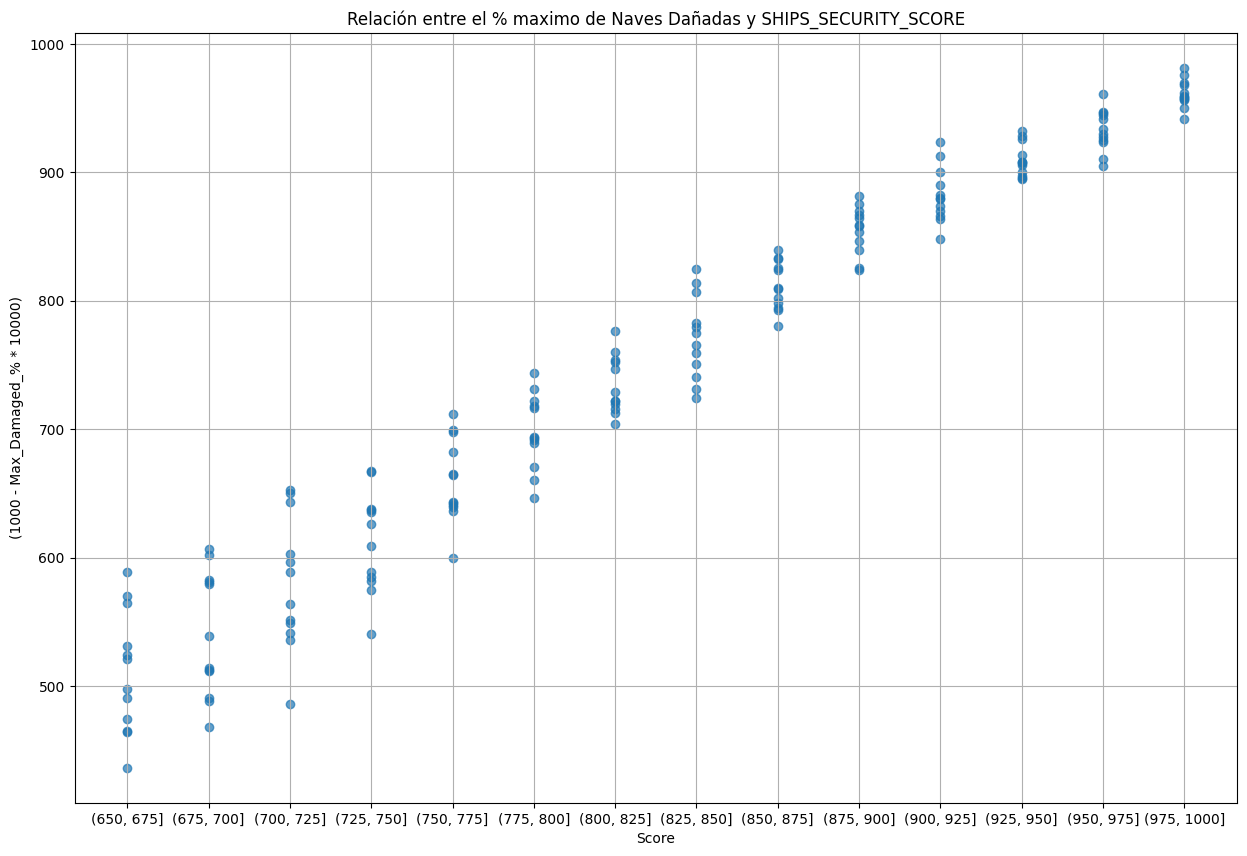

In [29]:
# Gráfica de dispersión entre el score y el porcentaje máximo de daño en las naves
plt.figure(figsize=(15, 10))
plt.scatter(metric['score'], metric['damaged_perc'], alpha=0.7)
plt.title('Relación entre el % maximo de Naves Dañadas y SHIPS_SECURITY_SCORE')
plt.xlabel('Score')
plt.ylabel('(1000 - Max_Damaged_% * 10000)')
plt.grid(True)
plt.show()

In [30]:
# Creación del boxplot interactivo 
fig = px.box(metric, x='score', y='damaged_perc',
             title='Relación entre el % maximo de Naves Dañadas y SHIPS_SECURITY_SCORE',
             labels={'score': 'Cohort-Score', 'calculated_metric': 'Métrica (1000 - Max Damaged Percentage * 10000)'},
             points="all")  

fig.update_layout(xaxis={'categoryorder':'total ascending'}, xaxis_title='SHIPS_SECURITY_SCORE', yaxis_title='(1000 - Max_Damaged_% * 10000)')
fig.show()


In [31]:
#Como pudimos observar, en la gráfica de Evolución de Daños por Cohorte, la velocidad de daño toca su punto máximo al mes 6 

#La idea es forcastear los daños en las naves en los próximos meses, para los cohortes en los que no alcanzamos a cubrir los 15 meses de análisis
# y así poder encontrar los posibles puntos máximos de daño en las naves para cada uno de ellos.

In [32]:
#Uno los dataframes agregando la columna de repair_perc al cohort_data
df = ch_df.merge(hl_df, left_on='mes_desp', right_on='month', how='left').drop(columns=['month'])

## FEATURE INGENIERING

### Variables de mes y año de llegada

In [33]:
df['año_llegada'] = df['mes_llegada'].dt.year
df['n_mes_llegada'] = df['mes_llegada'].dt.month

### SCORE a variable numérica

In [34]:
#Convierto la variable categórica score en numérica para entrenar un modelo de regresión lineal
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Convertimos la columna 'score' en valores numéricos
df['score_num'] = le.fit_transform(df['score'])

# Verificamos la transformación
df[['score', 'score_num']].head()


,score,score_num
0,"(650, 675]",0
1,"(650, 675]",0
2,"(650, 675]",0
3,"(650, 675]",0
4,"(650, 675]",0


In [35]:
df

,cohort,score,months,ships,damaged,mes_llegada,mes_desp,damaged_perc,req_repair_perc,año_llegada,n_mes_llegada,score_num
0,211611,"(650, 675]",0,1324,0,2116-11-01,2116-11-01,0.000000,0.021995,2116,11,0
1,211611,"(650, 675]",1,1324,0,2116-11-01,2116-12-01,0.000000,0.021500,2116,11,0
2,211611,"(650, 675]",2,1324,13,2116-11-01,2117-01-01,0.009819,0.020118,2116,11,0
3,211611,"(650, 675]",3,1324,29,2116-11-01,2117-02-01,0.021903,0.022944,2116,11,0
4,211611,"(650, 675]",4,1324,40,2116-11-01,2117-03-01,0.030211,0.023169,2116,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1759,211710,"(975, 1000]",0,542,0,2117-10-01,2117-10-01,0.000000,0.021114,2117,10,13
1760,211710,"(975, 1000]",1,542,0,2117-10-01,2117-11-01,0.000000,0.021781,2117,10,13
1761,211710,"(975, 1000]",2,542,0,2117-10-01,2117-12-01,0.000000,0.021015,2117,10,13
1762,211710,"(975, 1000]",3,542,1,2117-10-01,2118-01-01,0.001845,0.020502,2117,10,13


## MODELING

### Modelo de regresión lineal

In [36]:
# Seleccion de variables independientes y dependiente
X = df[['months', 'ships', 'req_repair_perc', 'año_llegada', 'n_mes_llegada', 'score_num']]
y = df['damaged_perc']



In [37]:
# Divicion del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


#### Evaluación del modelo

In [38]:

# Evaluación del modelo lineal
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [39]:
print('MSE: ', mse, '\n', 'R2: ' ,r2)

MSE:  5.7220393654325836e-05 
 R2:  0.688682463652059


#### Coeficientes del modelo

In [40]:

# Obtención de coeficientes del modelo
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
intercepto = model.intercept_


In [41]:
coeficientes, print('Intercepto: \n', intercepto)

Intercepto: 
 -19.439442090065835


(                  Coeficiente
 months           2.085490e-03
 ships           -2.862486e-07
 req_repair_perc -2.935562e-01
 año_llegada      9.193378e-03
 n_mes_llegada    7.753614e-04
 score_num       -2.255510e-03,
 None)

#### Análisis de sobreajuste y generalización del modelo

In [42]:
# Comparamos el rendimiento del modelo en entrenamiento y prueba
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

performance = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba"],
    "MSE": [mse_train, mse],
    "R2": [r2_train, r2]
})

performance

,Conjunto,MSE,R2
0,Entrenamiento,0.000057,0.700646
1,Prueba,0.000057,0.688682


La diferencia es pequeña, por lo que el modelo no está sobreajustado

#### Análisis de multicolinealidad / Residuos

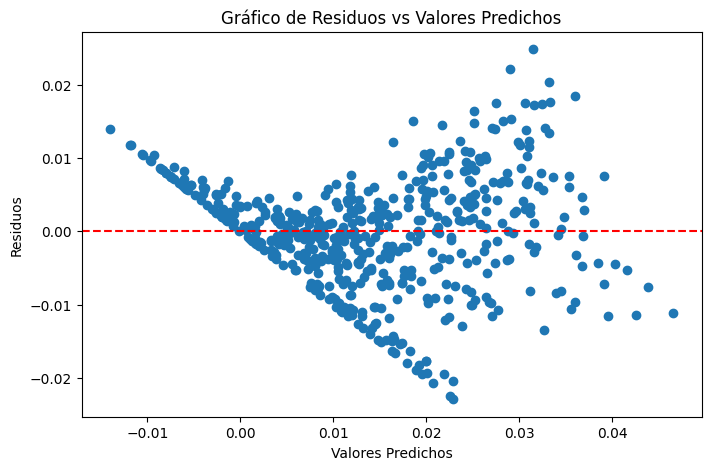

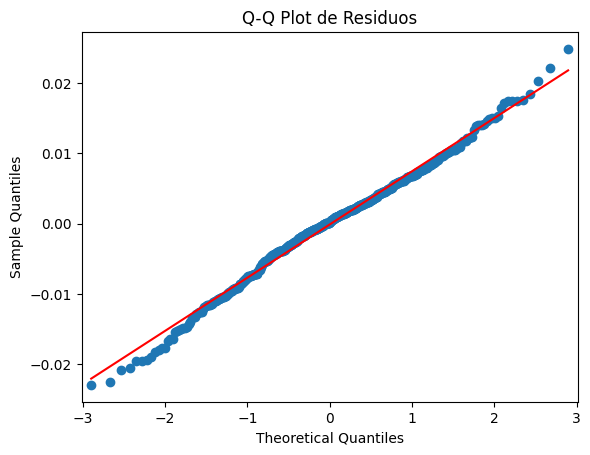

In [43]:

# Calculamos el VIF para analizar multicolinealidad
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Grafica de residuos
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Valores Predichos')
plt.show()

# Q-Q plot para verificar normalidad de residuos
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot de Residuos')
plt.show()


#### Prueba de normalidad con Shapiro-Wilk

In [44]:
# Prueba de normalidad con Shapiro-Wilk

shapiro_test = shapiro(residuals)

vif_data, shapiro_test

(          Variable         VIF
 0           months    3.140136
 1            ships    7.256900
 2  req_repair_perc  796.136098
 3      año_llegada  855.909904
 4    n_mes_llegada    3.819727
 5        score_num    5.263651,
 ShapiroResult(statistic=np.float64(0.9930604922550232), pvalue=np.float64(0.01501091908266322)))

Encontramos problemas severos de multicolinealidad en el modelo \
Especialmente en _'req_repair_perc'_ y _'año_llegada'_ por lo que se eliminarán estas variables para mejorar la precisión del mismo

Gráfico de residuos vs valores predichos:

    Los residuos están relativamente dispersos sin un patrón muy marcado, lo cual es un buen signo.

    Q-Q Plot: Los residuos parecen seguir una distribución aproximadamente normal.
    
    Prueba de Shapiro-Wilk: p-value = 0.189 (>0.05) sugiere que los residuos no violan la hipótesis de normalidad.


--Analizaremos otros modelos de regresión para comparar su rendimiento con el modelo lineal--

## Modelo Regresión Ridge y Lasso

In [45]:
# Aplicamos regresiones Ridge y Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)


In [46]:
# Comparar resultados
ridge_results = {"Modelo": "Ridge", "MSE": ridge_mse, "R2": ridge_r2}
lasso_results = {"Modelo": "Lasso", "MSE": lasso_mse, "R2": lasso_r2}
linear_results = {"Modelo": "Lineal", "MSE": mse, "R2": r2}

results_df = pd.DataFrame([linear_results, ridge_results, lasso_results])
results_df

,Modelo,MSE,R2
0,Lineal,0.000057,0.688682
1,Ridge,0.000057,0.689920
2,Lasso,0.000071,0.614888


La regresión Ridge muestra una leve mejora en R² respecto al modelo lineal original, mientras que Lasso ha empeorado el rendimiento,

Voy a eliminar las variables con mayor VIF (req_repair_perc y año_llegada) y volveré a probar con una regresión lineal para ver si logramos una mejora significativa.

In [47]:

# Eliminamos variables con alta multicolinealidad para volver a entrenar modelo lineal
X_reduced = X.drop(columns=['req_repair_perc', 'año_llegada'])
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model_red = LinearRegression()
model_red.fit(X_train_red, y_train_red)
y_pred_red = model_red.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
r2_red = r2_score(y_test_red, y_pred_red)


In [48]:
# Comparar con el resto
reduced_results = {"Modelo": "Lineal Red (sin col.)", "MSE": mse_red, "R2": r2_red}
results_df = pd.DataFrame([linear_results, ridge_results, lasso_results, reduced_results])
results_df

,Modelo,MSE,R2
0,Lineal,0.000057,0.688682
1,Ridge,0.000057,0.689920
2,Lasso,0.000071,0.614888
3,Lineal Red (sin col.),0.000061,0.672885


No se mostró una mejora eliminando variables con alta multicolinealidad, por lo que intentaré con modelos más complejos

## Modelo de Random Forest y Gradient Boosting

Modelaremos sin las variables req_repair_perc y año_llegada, ya que tienen alta multicolinealidad con otras variables.

In [49]:
# Entrenamiento de  modelos Random Forest y Gradient Boosting
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_red, y_train_red)
rf_pred = rf.predict(X_test_red)
rf_mse = mean_squared_error(y_test_red, rf_pred)
rf_r2 = r2_score(y_test_red, rf_pred)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_red, y_train_red)
gbr_pred = gbr.predict(X_test_red)
gbr_mse = mean_squared_error(y_test_red, gbr_pred)
gbr_r2 = r2_score(y_test_red, gbr_pred)


In [50]:
# Resultados
rf_results = {"Modelo": "Random Forest", "MSE": rf_mse, "R2": rf_r2}
gbr_results = {"Modelo": "Gradient Boosting", "MSE": gbr_mse, "R2": gbr_r2}

results_df = pd.DataFrame([linear_results, ridge_results, lasso_results, reduced_results, rf_results, gbr_results])
results_df

,Modelo,MSE,R2
0,Lineal,0.000057,0.688682
1,Ridge,0.000057,0.689920
2,Lasso,0.000071,0.614888
3,Lineal Red (sin col.),0.000061,0.672885
4,Random Forest,0.000003,0.985684
5,Gradient Boosting,0.000003,0.986207


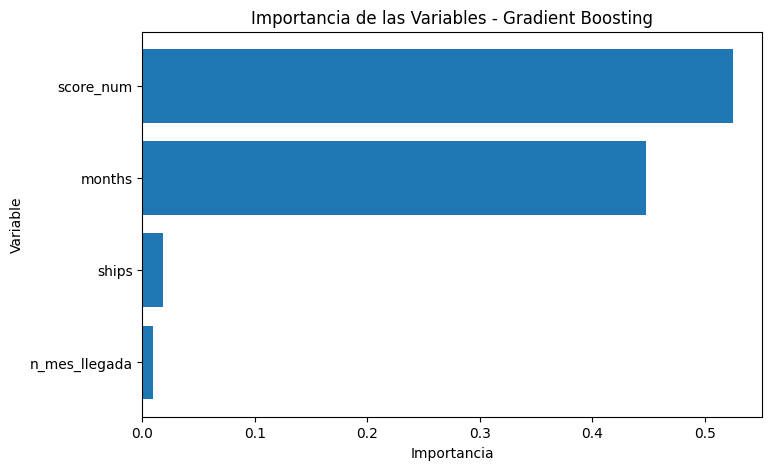

In [51]:

# Analizamos la importancia de variables en Gradient Boosting
feature_importances = pd.DataFrame({'Variable': X_reduced.columns, 'Importancia': gbr.feature_importances_}).sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(8, 5))
plt.barh(feature_importances['Variable'], feature_importances['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()


In [52]:

# Evaluamos que Gradient Boosting no sobreajuste
gbr_train_pred = gbr.predict(X_train_red)
gbr_train_mse = mean_squared_error(y_train_red, gbr_train_pred)
gbr_train_r2 = r2_score(y_train_red, gbr_train_pred)

# Evaluamos el modelo Gradient Boosting en el conjunto de prueba
gbr_test_mse = mean_squared_error(y_test_red, gbr_pred)
gbr_test_r2 = r2_score(y_test_red, gbr_pred)

# Comparacion del rendimiento
gbr_performance = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba"],
    "MSE": [gbr_train_mse, gbr_test_mse],
    "R2": [gbr_train_r2, gbr_test_r2]
})

gbr_performance


Nos quedaremos con el modelo de Gradient Boosting, ya que es el que mejor se ajusta a los datos y no presenta sobreajuste.

# Generar Registros faltantes

El objetivo es encontrar los máximos de daño en las naves para cada uno de los cohortes

In [54]:
# Creamos un DataFrame con todas las combinaciones posibles de cohort, score y months hasta 15
all_combinations = (
    df[['cohort', 'score']]
    .drop_duplicates()
    .merge(pd.DataFrame({'months': range(0, 16)}), how='cross')
)


In [55]:
all_combinations.head(1)

,cohort,score,months
0,211611,"(650, 675]",0


In [56]:

# Unimos con el dataset original para identificar los registros existentes
merged = all_combinations.merge(df, on=['cohort', 'score', 'months'], how='left')


# Llenamos las columnas faltantes con valores existentes para cada cohort-score
merged['ships'] = merged.groupby(['cohort', 'score'])['ships'].transform('max')
merged['n_mes_llegada'] = merged['cohort'].astype(str).str[4:6].astype(int)
merged['score_num'] = le.transform(merged['score'])


In [59]:


# Filtramos solo los nuevos registros (damaged_perc nulo)
new_data = merged[merged['damaged_perc'].isna()]
new_data.reset_index(drop=True, inplace=True)

# Seleccionamos las variables para predicción
X_new = new_data[['months', 'ships', 'n_mes_llegada', 'score_num']]

# Predecimos los nuevos valores de damaged_perc
new_data['damaged_perc_pred'] = gbr.predict(X_new)



/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/606056100.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
#Rellenamos la columna de damaged_perc con los valores predichos
new_data['damaged_perc'] = new_data['damaged_perc_pred']

/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/1586575780.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
#Calculamos el número de naves dañadas predichas
new_data['damaged'] = new_data['damaged_perc']*new_data['ships']
new_data['damaged'] = new_data['damaged'].astype(int)

/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/4032332320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/4032332320.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
#Unimos el dataframe con el real para tener una vista completa de los datos
new_df = pd.concat([df, new_data], axis=0).drop_duplicates(subset=['cohort', 'score', 'months'], keep='first')

# NUEVO ANALSIS EXPLORATORIO

In [64]:
new_df

,cohort,score,months,ships,damaged,mes_llegada,mes_desp,damaged_perc,req_repair_perc,año_llegada,n_mes_llegada,score_num,damaged_perc_pred
0,211611,"(650, 675]",0,1324.0,0,2116-11-01,2116-11-01,0.000000,0.021995,2116.0,11,0,NaN
1,211611,"(650, 675]",1,1324.0,0,2116-11-01,2116-12-01,0.000000,0.021500,2116.0,11,0,NaN
2,211611,"(650, 675]",2,1324.0,13,2116-11-01,2117-01-01,0.009819,0.020118,2116.0,11,0,NaN
3,211611,"(650, 675]",3,1324.0,29,2116-11-01,2117-02-01,0.021903,0.022944,2116.0,11,0,NaN
4,211611,"(650, 675]",4,1324.0,40,2116-11-01,2117-03-01,0.030211,0.023169,2116.0,11,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,211710,"(975, 1000]",11,542.0,2,NaT,NaT,0.004824,NaN,NaN,10,13,0.004824
920,211710,"(975, 1000]",12,542.0,2,NaT,NaT,0.004684,NaN,NaN,10,13,0.004684
921,211710,"(975, 1000]",13,542.0,2,NaT,NaT,0.004600,NaN,NaN,10,13,0.004600
922,211710,"(975, 1000]",14,542.0,2,NaT,NaT,0.004538,NaN,NaN,10,13,0.004538


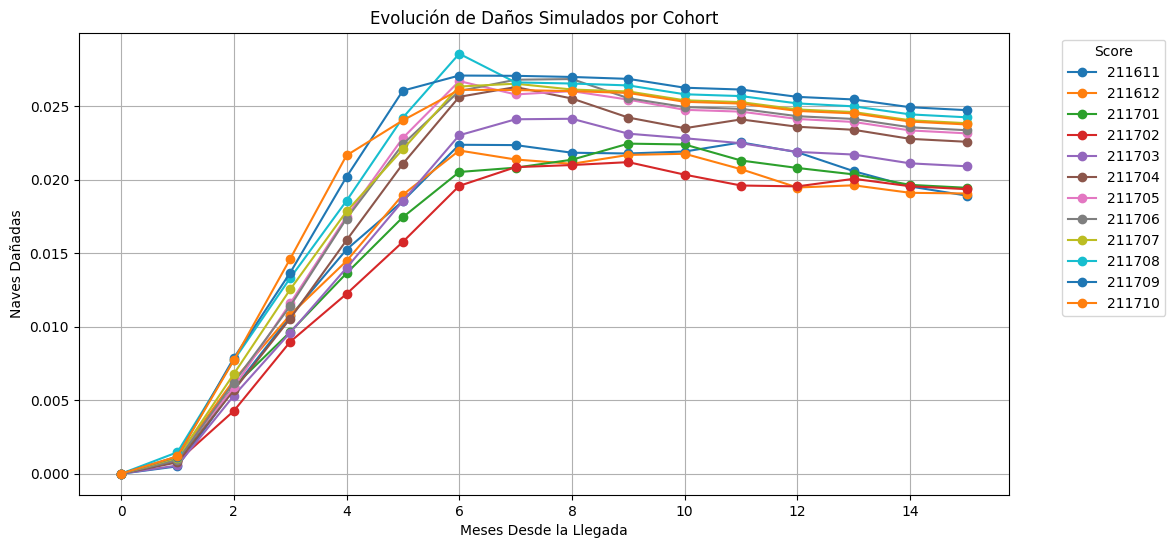

In [65]:
# 3. Evolución del daño en cohortes
cohort_damage_trend = new_df.groupby(['cohort', "months"])["damaged_perc"].mean().unstack()

plt.figure(figsize=(12, 6))
for cohort in cohort_damage_trend.index:  
    plt.plot(cohort_damage_trend.columns, cohort_damage_trend.loc[cohort], marker='o', linestyle='-', label=cohort)

plt.xlabel("Meses Desde la Llegada")
plt.ylabel("Naves Dañadas")
plt.title("Evolución de Daños Simulados por Cohort")
plt.legend(title="Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


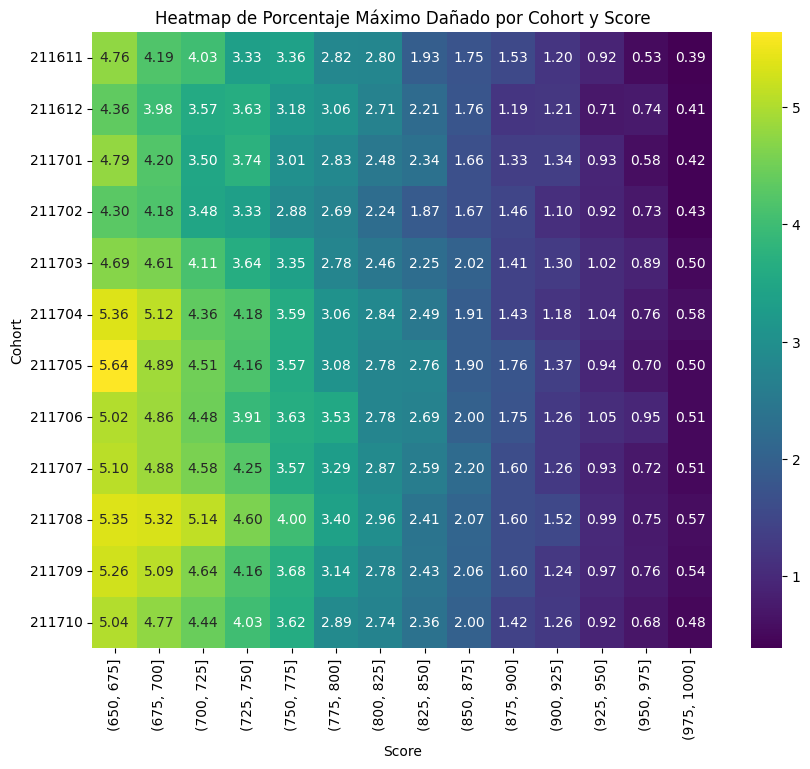

In [66]:
pivot_table = new_df.groupby(['cohort', 'score'])['damaged_perc'].max().unstack()
pivot_table = pivot_table.astype(float) 
pivot_table = pivot_table*100

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap de Porcentaje Máximo Dañado por Cohort y Score")
plt.xlabel("Score")
plt.ylabel("Cohort")
plt.show()

pivot_table = ch_df.groupby(['cohort', 'score'])['damaged_perc'].median().unstack()
pivot_table = pivot_table.astype(float)
pivot_table = pivot_table*100

In [72]:
# Calculamos maximos porcentajes de daño por cohort-score con el fin de encontrar un nuevo score hipotético

In [73]:
new_max = new_df.groupby(['cohort', 'score'])['damaged_perc'].max().reset_index()
new_max['score_num'] = 1000 - new_max['damaged_perc']*10000
new_max[(new_max['cohort'] == '211704') & (new_max['score'] == '(650, 675]')]

,cohort,score,damaged_perc,score_num
70,211704,"(650, 675]",0.053589,464.110128


In [74]:
# Creamos intervalos de 25 con el nuevo score numérico para poder comparar con el score original
new_max['score_refined'] = pd.cut(new_max['score_num'], bins=range(400, 1025, 25))


In [75]:
#Implantamos nuevo score en el dataframe original 
new_df = new_df.merge( new_max[['cohort', 'score', 'score_refined']], on=['cohort', 'score'], how='left')

In [76]:
new_df[new_df['score_refined'].isna()]#.sum()

,cohort,score,months,ships,damaged,mes_llegada,mes_desp,damaged_perc,req_repair_perc,año_llegada,n_mes_llegada,score_num,damaged_perc_pred,score_refined


/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/1447490720.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



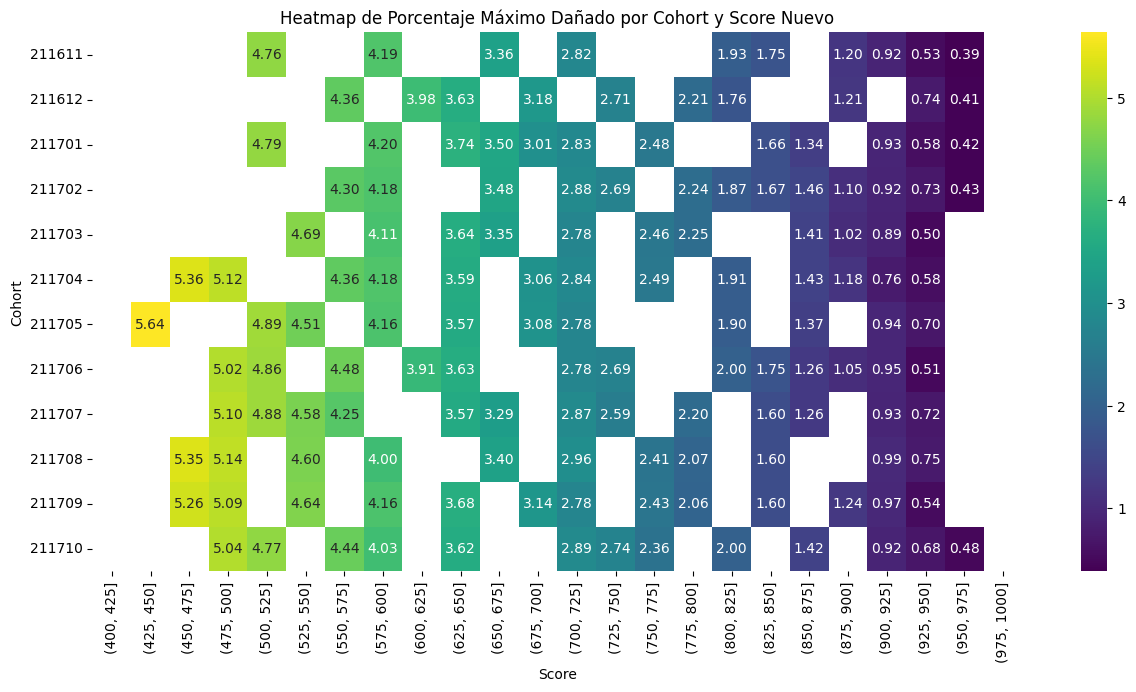

In [77]:
pivot_table = new_df.groupby(['cohort', 'score_refined'])['damaged_perc'].max().unstack()
pivot_table = pivot_table.astype(float)
pivot_table = pivot_table*100



plt.figure(figsize=(15, 7))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap de Porcentaje Máximo Dañado por Cohort y Score Nuevo")
plt.xlabel("Score")
plt.ylabel("Cohort")
plt.show()


/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/2193830994.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



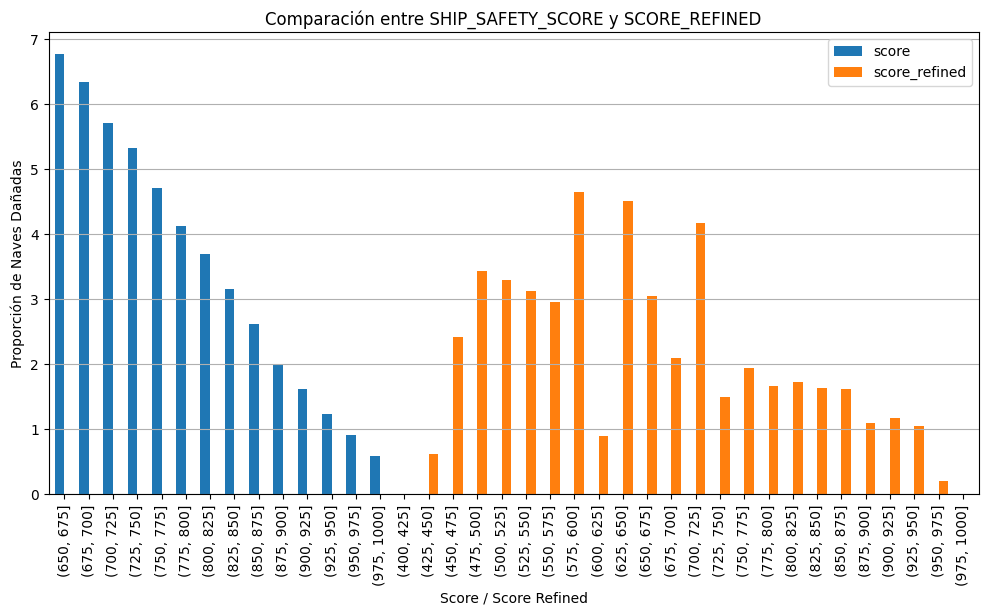

In [78]:
# Calculamos la proporción de naves dañadas para 'score' y 'score_refined'
safety_damage_score = new_df.groupby("score")["damaged_perc"].sum()
safety_damage_refined = new_df.groupby("score_refined")["damaged_perc"].sum()

comparison_df = pd.DataFrame({
    "score": safety_damage_score,
    "score_refined": safety_damage_refined
})

# Creación de gráfico de barras dobles
comparison_df.plot(kind="bar", figsize=(12, 6), width=0.8)

plt.xlabel("Score / Score Refined")
plt.ylabel("Proporción de Naves Dañadas")
plt.title("Comparación entre SHIP_SAFETY_SCORE y SCORE_REFINED")
plt.grid(axis="y")
plt.show()

In [82]:
#Analizamos la dispersión con el nuevo score y el porcentaje máximo de daño en las naves

In [79]:
metric = (1000 - new_df.groupby(['cohort', 'score_refined'])['damaged_perc'].max()*10000).reset_index()
metric['score_refined'] = metric['score_refined'].astype(str)

/var/folders/ky/tbkymtn576bbzrqy8_px82qw0000gn/T/ipykernel_56778/953494981.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



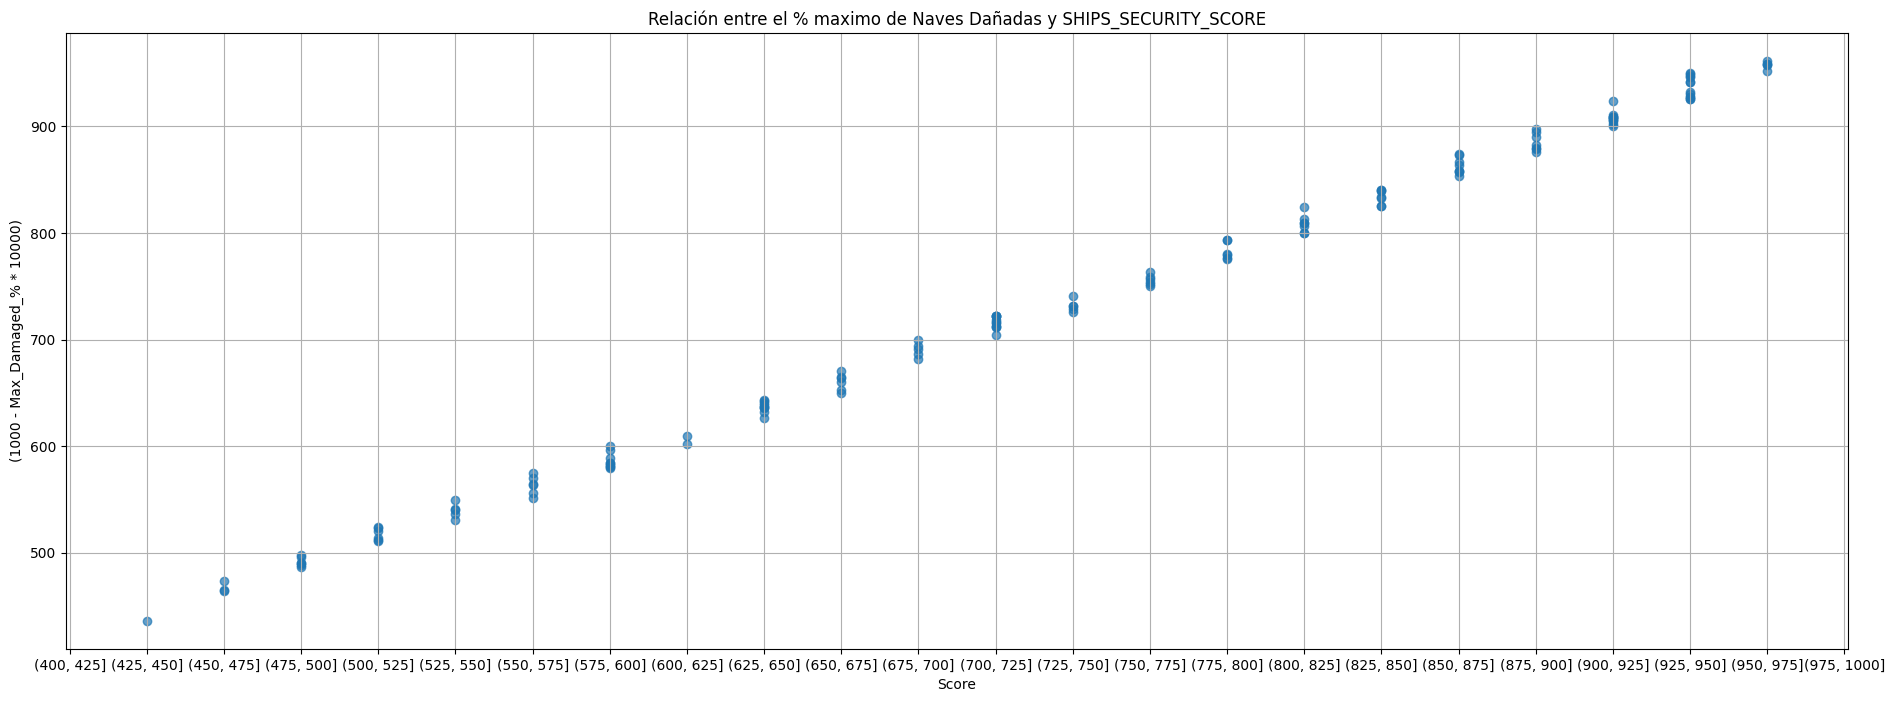

In [81]:
#Creación de gráfica de dispersión con el nuevo score y el porcentaje máximo de daño en las naves
plt.figure(figsize=(23, 8))
plt.scatter(metric['score_refined'], metric['damaged_perc'], alpha=0.7)
plt.title('Relación entre el % maximo de Naves Dañadas y SHIPS_SECURITY_SCORE')
plt.xlabel('Score')
plt.ylabel('(1000 - Max_Damaged_% * 10000)')
plt.grid(True)
plt.show()